In [101]:
# !pip install seaborn

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [152]:
def create_summary_dataframe(summary_df):
    rmse_columns = [col for col in summary_df.columns if col.startswith('rmse_')]
    summary_df['best_rmse'] = summary_df[rmse_columns].idxmin(axis=1)
    return summary_df

# Comparing with benchmark

In [153]:
# 0,19 seg
mean_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_mean.csv')
mean_0 = mean_0[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_0['codigo_barras_sku'].nunique(), mean_0.shape, mean_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# 0,34 seg
mean_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_mean.csv')
mean_1 = mean_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_1['codigo_barras_sku'].nunique(), mean_1.shape, mean_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# 0,23 seg
mean_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_mean.csv')
mean_2 = mean_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_2['codigo_barras_sku'].nunique(), mean_2.shape, mean_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (219, 4) (219, 2)
10 (198, 4) (198, 2)
10 (223, 4) (223, 2)


In [154]:
print(mean_0['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_0['rmse_cant_vta_pred_mean_pdv_sku'].mean())
print(mean_1['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_1['rmse_cant_vta_pred_mean_pdv_sku'].mean())
print(mean_2['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_2['rmse_cant_vta_pred_mean_pdv_sku'].mean())

6626.7 9245.24794520548
38956.85 147077.27979797978
19162.7 30806.54484304933


## SFF

In [155]:
# SFF
# 3711 seg
sff_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_sff.csv')
sff_0 = sff_0[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_0['codigo_barras_sku'].nunique(), sff_0.shape, sff_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 3413 seg
sff_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_sff.csv')
sff_1 = sff_1[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_1['codigo_barras_sku'].nunique(), sff_1.shape, sff_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 4168 seg
sff_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_sff.csv')
sff_2 = sff_2[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_2['codigo_barras_sku'].nunique(), sff_2.shape, sff_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (219, 3) (219, 2)
10 (198, 3) (198, 2)
10 (223, 3) (223, 2)


In [156]:
print(sff_0['rmse_cant_vta_pred_sff_mean'].median(),sff_0['rmse_cant_vta_pred_sff_mean'].mean())
print(sff_1['rmse_cant_vta_pred_sff_mean'].median(),sff_1['rmse_cant_vta_pred_sff_mean'].mean())
print(sff_2['rmse_cant_vta_pred_sff_mean'].median(),sff_2['rmse_cant_vta_pred_sff_mean'].mean())

6287.0 9077.830593607305
30709.45 137024.09797979798
15902.0 27637.335874439465


best_rmse
rmse_cant_vta_pred_sff_mean        122
rmse_cant_vta_pred_mean_pdv_sku     97
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_sff_mean        176
rmse_cant_vta_pred_mean_pdv_sku     22
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_sff_mean        190
rmse_cant_vta_pred_mean_pdv_sku     33
Name: count, dtype: int64


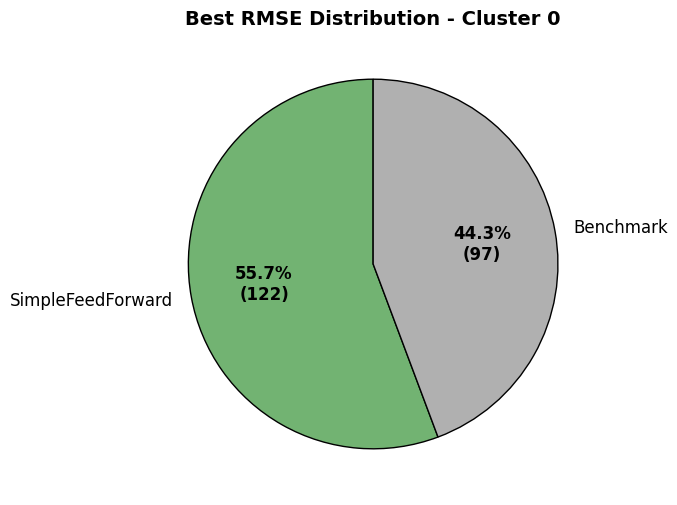

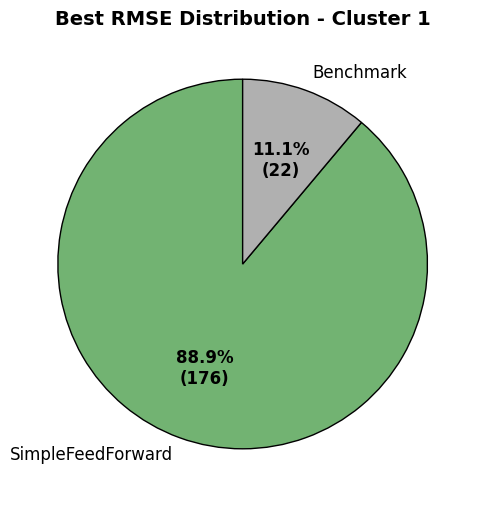

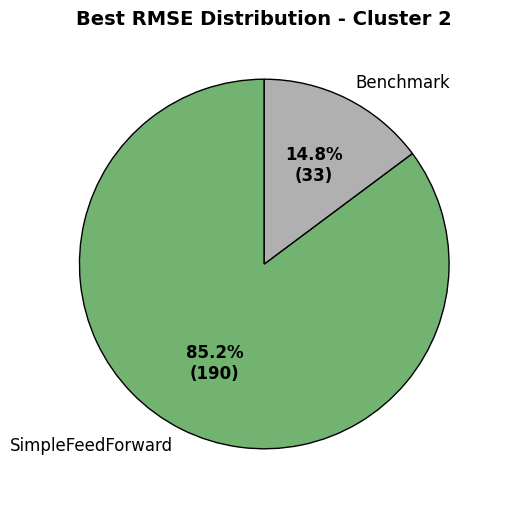

In [157]:
#a)
test_0 = sff_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = sff_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = sff_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_sff_mean": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_sff_mean": "SimpleFeedForward"
}

# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]
# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Define custom function to show percentage on top and count below
    def make_autopct(values):
        def autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'  # Line break between % and count
        return autopct

    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, 
        autopct=make_autopct(value_counts),  # Show % and count
        startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()


In [224]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_sff_mean']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_sff_mean']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_sff_mean']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: sff gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: sff gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: sff gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")


cluster 0: sff gana en 55.7% de casos
Mediana de la mejora: 6.6%
cluster 1: sff gana en 88.9% de casos
Mediana de la mejora: 17.3%
cluster 2: sff gana en 85.2% de casos
Mediana de la mejora: 12.7%


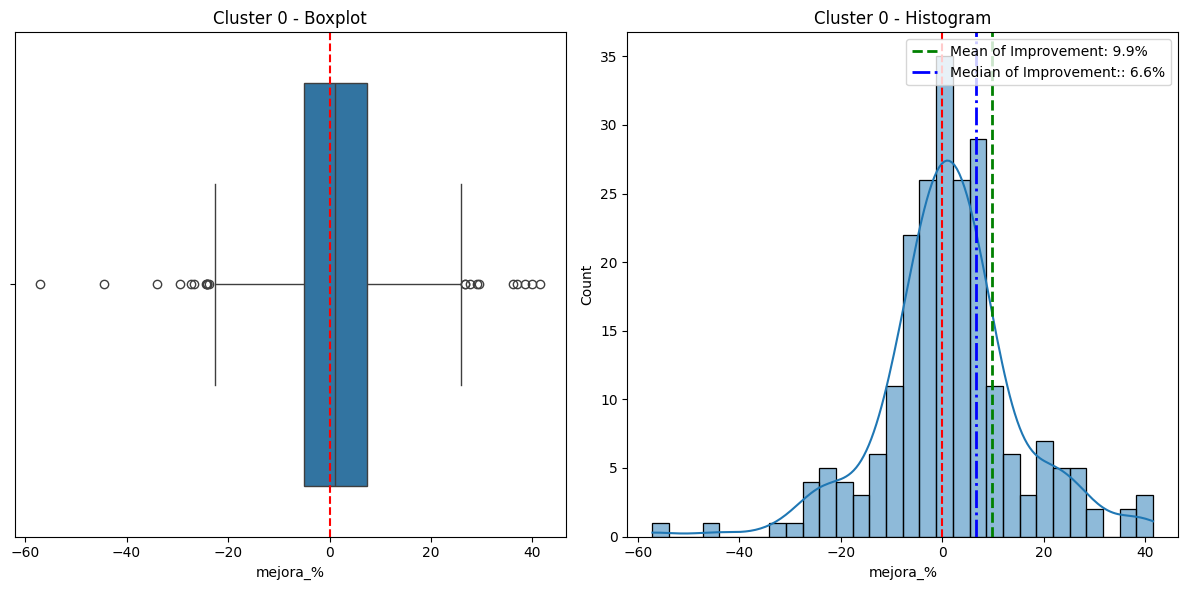

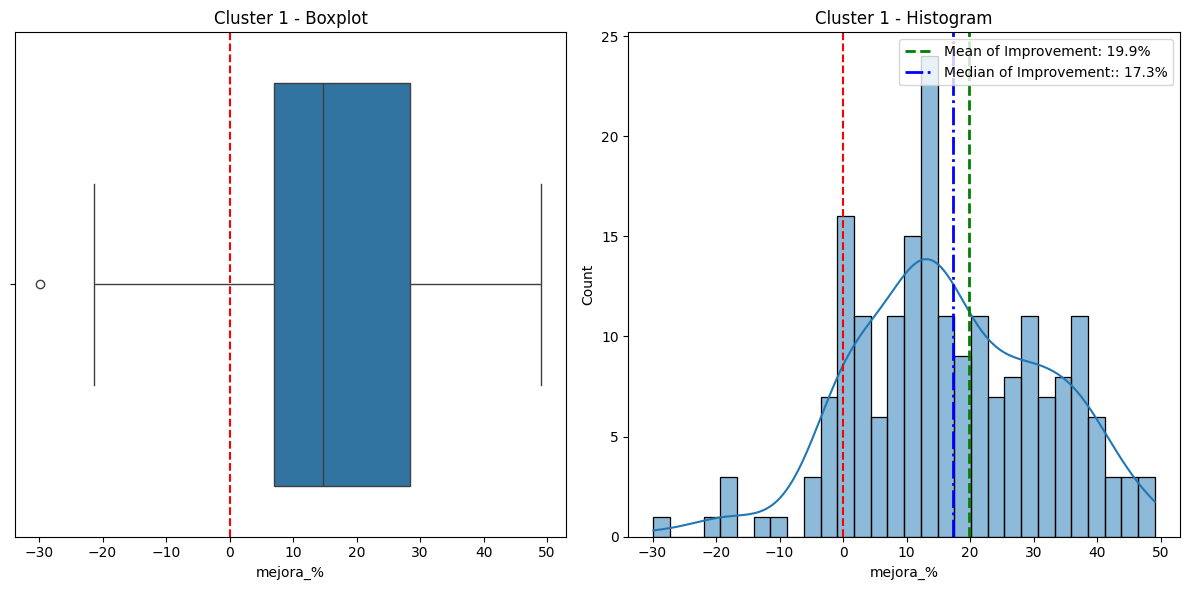

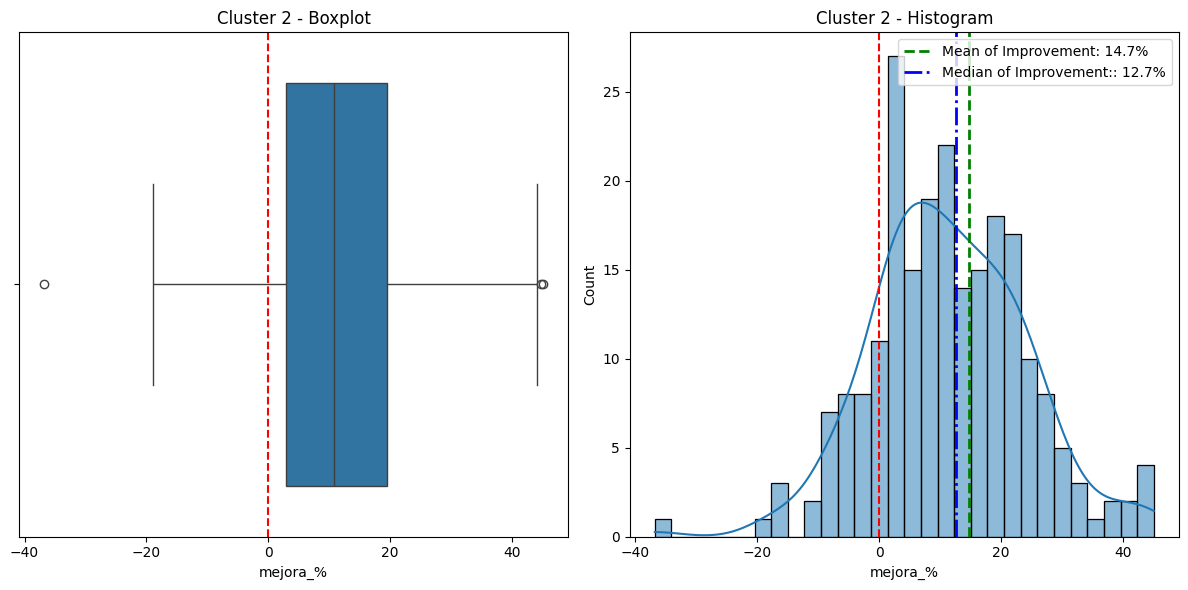

In [159]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')

    # Calculate mean and median (only positive improvements if needed)
    positive_improvements = data[data['mejora_%'] > 0]['mejora_%']
    mean_value = positive_improvements.mean()
    median_value = positive_improvements.median()

    # Add vertical lines for mean and median
    axes[1].axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean of Improvement: {mean_value:.1f}%')
    axes[1].axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median of Improvement:: {median_value:.1f}%')

    # Add legend
    axes[1].legend(loc='upper right', fontsize=10)

    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()


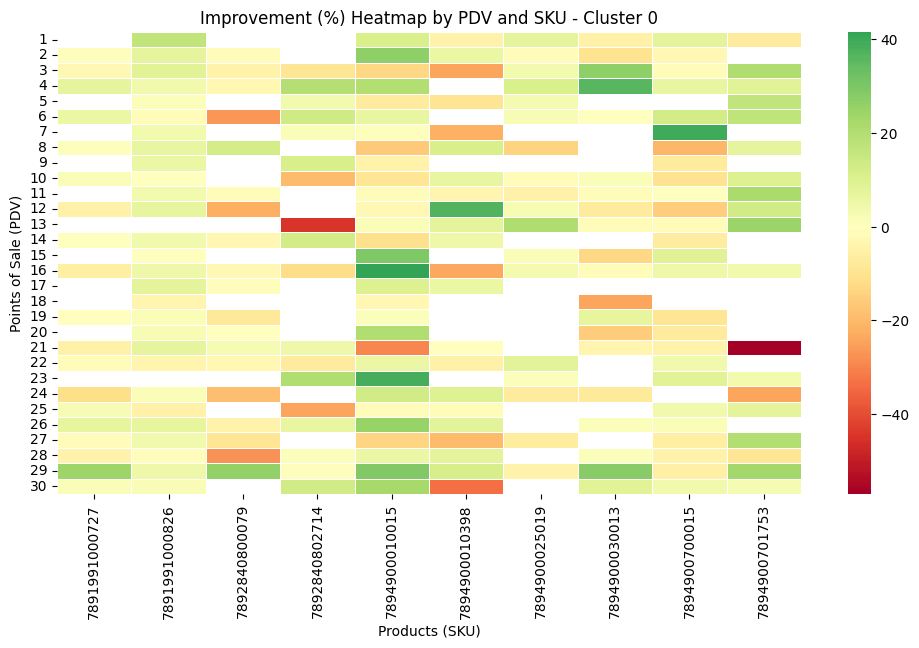

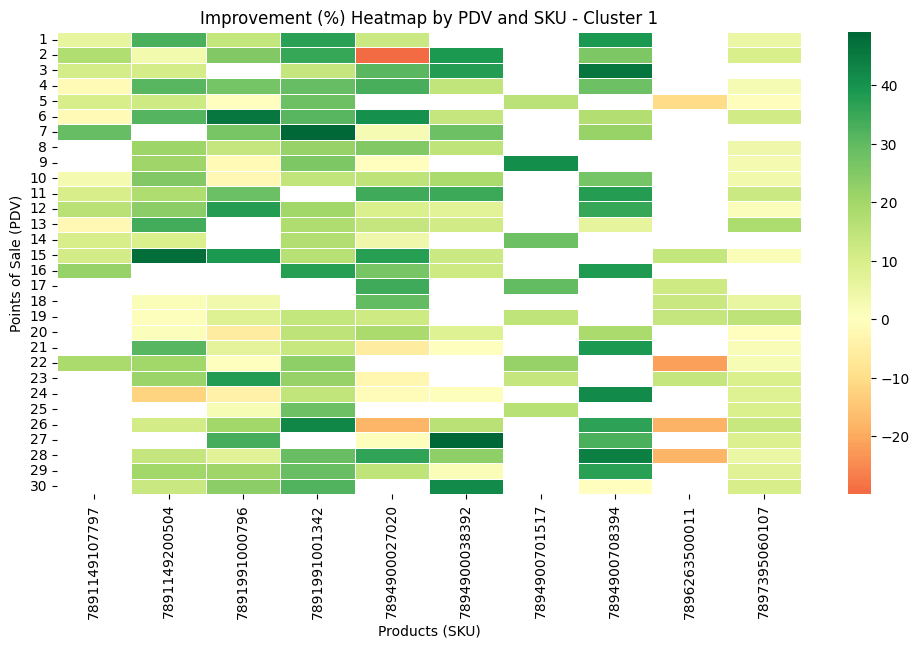

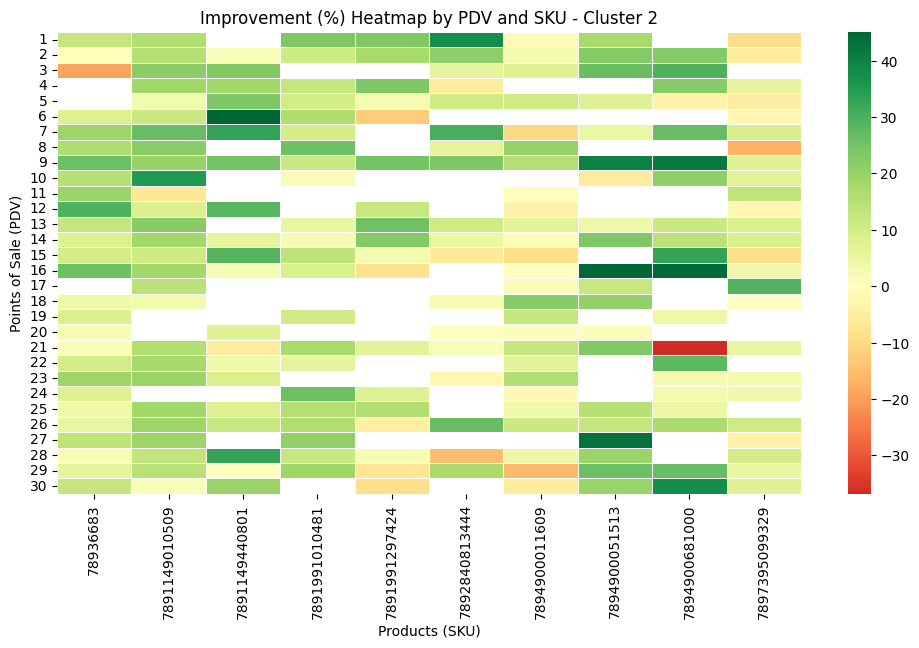

In [160]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately


# DeepAR

In [225]:
#  16095 seg
deepar_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_deepar.csv')
print(deepar_0['codigo_barras_sku'].nunique(), deepar_0.shape, deepar_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
deepar_0['rmse_cant_vta_pred_deepar'] = np.where(
    deepar_0['rmse_cant_vta_pred_deepar_mean'] < deepar_0['rmse_cant_vta_pred_deepar_median'],
    deepar_0['rmse_cant_vta_pred_deepar_mean'],
    deepar_0['rmse_cant_vta_pred_deepar_median']
)
deepar_0 = deepar_0[['pdv_codigo', 'codigo_barras_sku', 
                     'rmse_cant_vta_pred_deepar']]

# # #  55653 seg
# deepar_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_deepar_test.csv')
# print(deepar_0['codigo_barras_sku'].nunique(), deepar_0.shape, deepar_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# deepar_0['rmse_cant_vta_pred_deepar'] = np.where(
#     deepar_0['rmse_cant_vta_pred_deepar_mean'] < deepar_0['rmse_cant_vta_pred_deepar_median'],
#     deepar_0['rmse_cant_vta_pred_deepar_mean'],
#     deepar_0['rmse_cant_vta_pred_deepar_median']
# )
# deepar_0 = deepar_0[['pdv_codigo', 'codigo_barras_sku', 
#                      'rmse_cant_vta_pred_deepar']]

# # 16436 seg
# deepar_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_deepar.csv')
# print(deepar_1['codigo_barras_sku'].nunique(), deepar_1.shape, deepar_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# deepar_1['rmse_cant_vta_pred_deepar'] = np.where(
#     deepar_1['rmse_cant_vta_pred_deepar_mean'] < deepar_1['rmse_cant_vta_pred_deepar_median'],
#     deepar_1['rmse_cant_vta_pred_deepar_mean'],
#     deepar_1['rmse_cant_vta_pred_deepar_median']
# )
# deepar_1 = deepar_1[['pdv_codigo', 'codigo_barras_sku', 
#                      'rmse_cant_vta_pred_deepar']]

#  89000 seg
deepar_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_deepar_test.csv')
print(deepar_1['codigo_barras_sku'].nunique(), deepar_1.shape, deepar_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
deepar_1['rmse_cant_vta_pred_deepar'] = np.where(
    deepar_1['rmse_cant_vta_pred_deepar_mean'] < deepar_1['rmse_cant_vta_pred_deepar_median'],
    deepar_1['rmse_cant_vta_pred_deepar_mean'],
    deepar_1['rmse_cant_vta_pred_deepar_median']
)
deepar_1 = deepar_1[['pdv_codigo', 'codigo_barras_sku',
                     'rmse_cant_vta_pred_deepar']]


# # 2987   seg , not representative 
# deepar_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_deepar.csv')
# print(deepar_2['codigo_barras_sku'].nunique(), deepar_2.shape, deepar_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# deepar_2['rmse_cant_vta_pred_deepar'] = np.where(
#     deepar_2['rmse_cant_vta_pred_deepar_mean'] < deepar_2['rmse_cant_vta_pred_deepar_median'],
#     deepar_2['rmse_cant_vta_pred_deepar_mean'],
#     deepar_2['rmse_cant_vta_pred_deepar_median']
# )
# deepar_2 = deepar_2[['pdv_codigo', 'codigo_barras_sku',
#                         'rmse_cant_vta_pred_deepar']]

# 78000 seg
deepar_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_deepar_test.csv')
print(deepar_2['codigo_barras_sku'].nunique(), deepar_2.shape, deepar_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
deepar_2['rmse_cant_vta_pred_deepar'] = np.where(
    deepar_2['rmse_cant_vta_pred_deepar_mean'] < deepar_2['rmse_cant_vta_pred_deepar_median'],
    deepar_2['rmse_cant_vta_pred_deepar_mean'],
    deepar_2['rmse_cant_vta_pred_deepar_median']
)
deepar_2 = deepar_2[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_deepar']]



10 (219, 8) (219, 2)
10 (198, 8) (198, 2)
10 (223, 8) (223, 2)


In [210]:
print(deepar_0['rmse_cant_vta_pred_deepar'].median(),deepar_0['rmse_cant_vta_pred_deepar'].mean())
print(deepar_1['rmse_cant_vta_pred_deepar'].median(),deepar_1['rmse_cant_vta_pred_deepar'].mean())
print(deepar_2['rmse_cant_vta_pred_deepar'].median(),deepar_2['rmse_cant_vta_pred_deepar'].mean())

6992.2 9490.891780821918
34277.7 147637.25505050505
18070.3 29542.019282511206


best_rmse
rmse_cant_vta_pred_mean_pdv_sku    110
rmse_cant_vta_pred_deepar          109
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_deepar          125
rmse_cant_vta_pred_mean_pdv_sku     73
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_deepar          160
rmse_cant_vta_pred_mean_pdv_sku     63
Name: count, dtype: int64


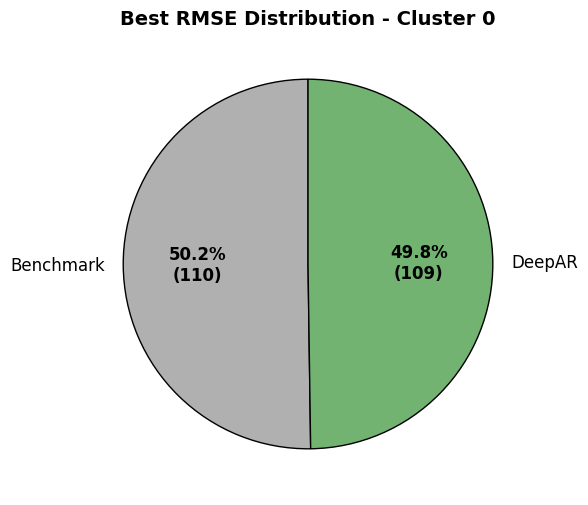

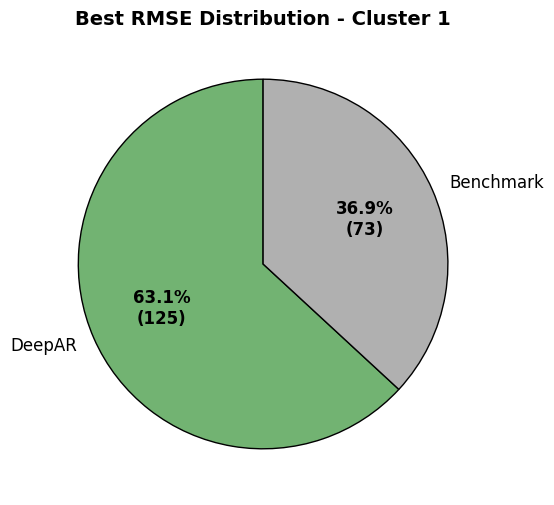

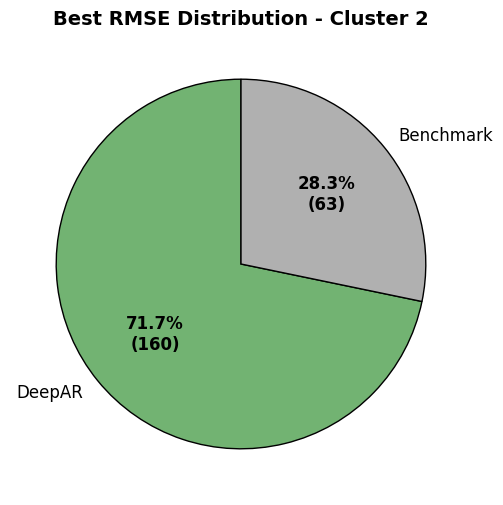

In [226]:
#a)
test_0 = deepar_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = deepar_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = deepar_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_deepar": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_deepar": "DeepAR"
}

# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]
# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Define custom function to show percentage on top and count below
    def make_autopct(values):
        def autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'  # Line break between % and count
        return autopct

    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, 
        autopct=make_autopct(value_counts),  # Show % and count
        startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()

In [227]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_deepar']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_deepar']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_deepar']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: deepar gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: deepar gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: deepar gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")

cluster 0: deepar gana en 49.8% de casos
Mediana de la mejora: 5.8%
cluster 1: deepar gana en 63.1% de casos
Mediana de la mejora: 17.3%
cluster 2: deepar gana en 71.7% de casos
Mediana de la mejora: 13.1%


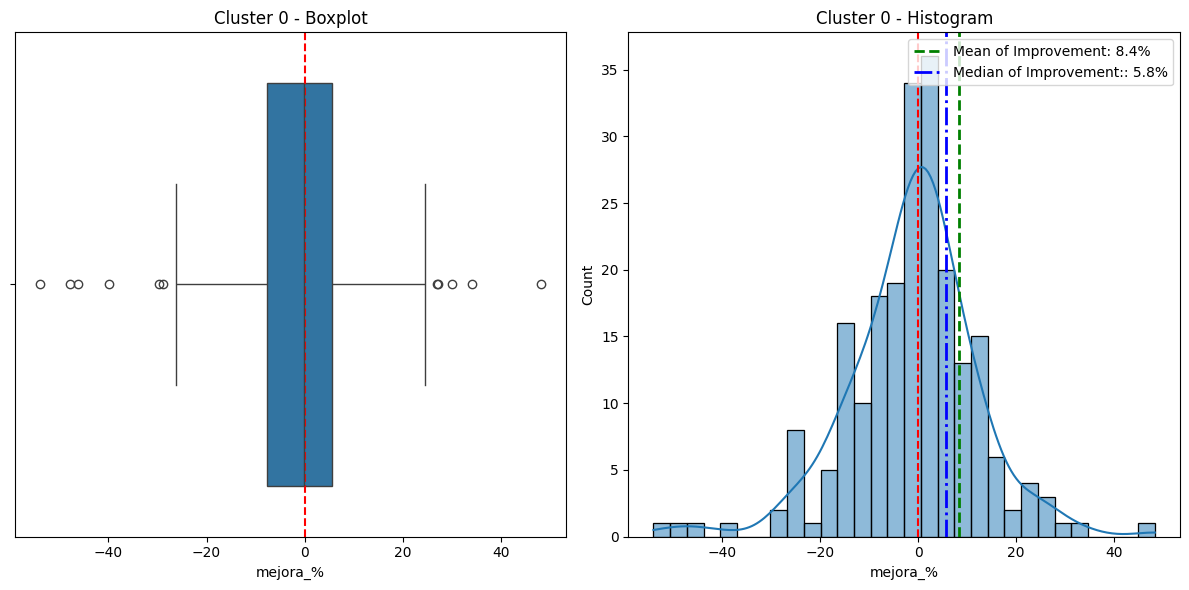

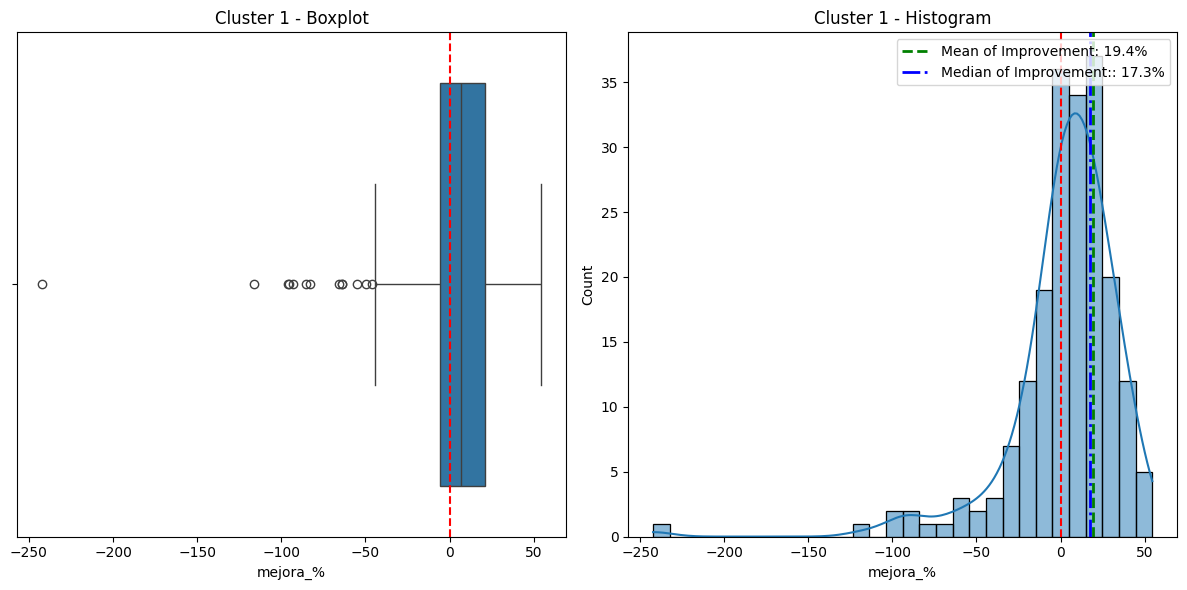

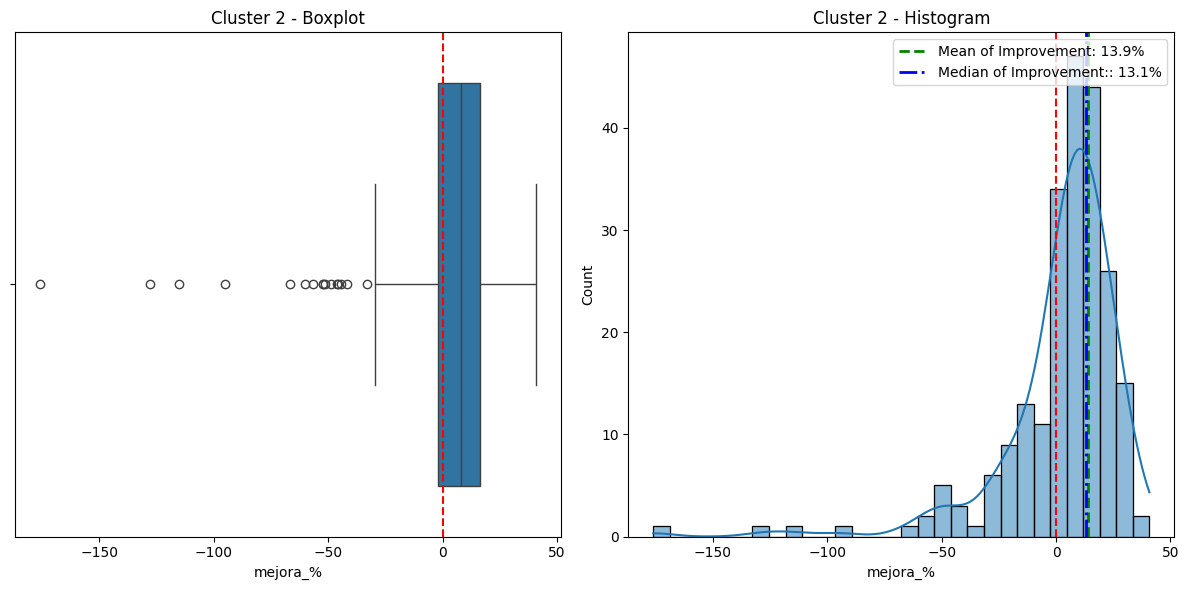

In [164]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')

    # Calculate mean and median (only positive improvements if needed)
    positive_improvements = data[data['mejora_%'] > 0]['mejora_%']
    mean_value = positive_improvements.mean()
    median_value = positive_improvements.median()

    # Add vertical lines for mean and median
    axes[1].axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean of Improvement: {mean_value:.1f}%')
    axes[1].axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median of Improvement:: {median_value:.1f}%')

    # Add legend
    axes[1].legend(loc='upper right', fontsize=10)

    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()

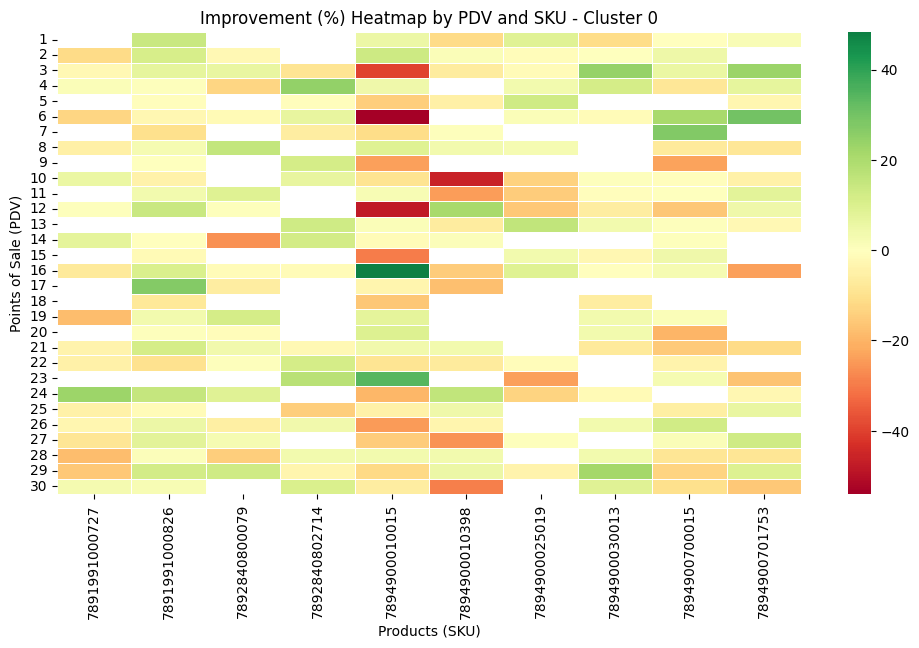

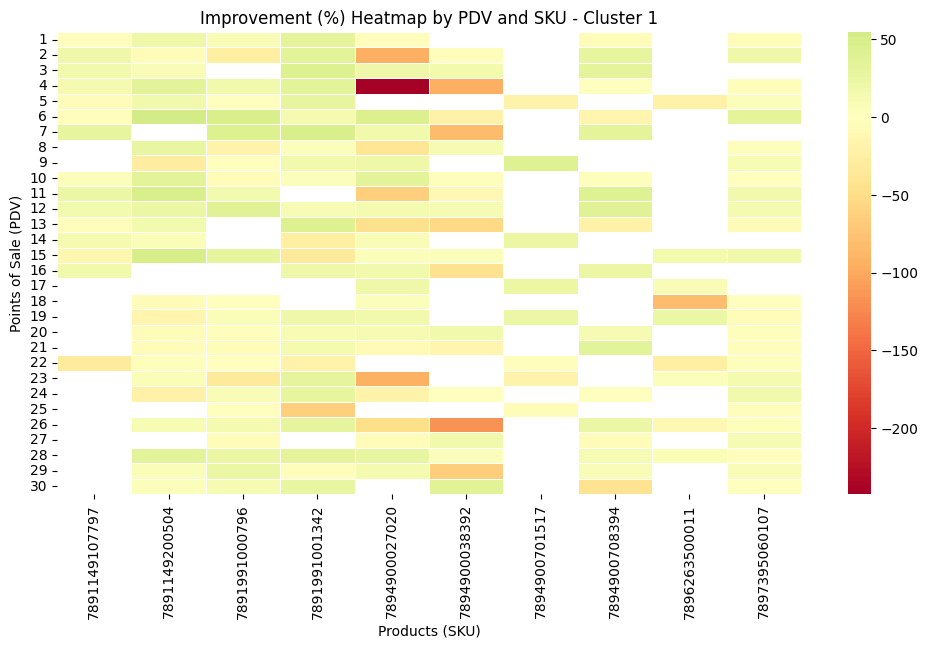

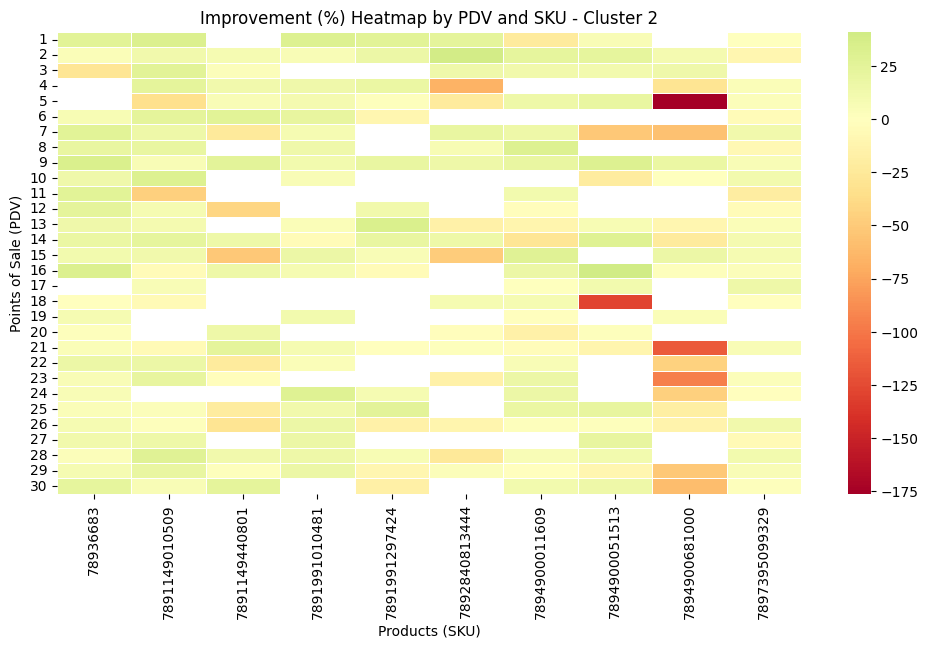

In [165]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately

# TFT 

In [230]:
# # 40000 seg  no presentativo
# tft_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_tft.csv')
# tft_0 = tft_0[['pdv_codigo', 'codigo_barras_sku',
#          'rmse_cant_vta_pred_tft_mean']]
# print(tft_0['codigo_barras_sku'].nunique(), tft_0.shape, tft_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 58000 seg v2
tft_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_tft_test.csv')
tft_0 = tft_0[['pdv_codigo', 'codigo_barras_sku',
         'rmse_cant_vta_pred_tft_mean']]
print(tft_0['codigo_barras_sku'].nunique(), tft_0.shape, tft_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)


# # # 27491 sef 
# tft_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_tft.csv')
# tft_1 = tft_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_tft_mean',
#          'rmse_cant_vta_pred_tft_mean']]
# print(tft_1['codigo_barras_sku'].nunique(), tft_1.shape, tft_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 44821 seg 
tft_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_tft_test.csv')
tft_1 = tft_1[['pdv_codigo', 'codigo_barras_sku', 
            'rmse_cant_vta_pred_tft_mean']]
print(tft_1['codigo_barras_sku'].nunique(), tft_1.shape, tft_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)


# # 46173 seg , not rep.
# tft_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_tft.csv')
# tft_2 = tft_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_tft_mean',
#             'rmse_cant_vta_pred_tft_mean']]
# print(tft_2['codigo_barras_sku'].nunique(), tft_2.shape, tft_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 60137 seg
tft_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_tft_test.csv')
tft_2 = tft_2[['pdv_codigo', 'codigo_barras_sku',
            'rmse_cant_vta_pred_tft_mean']]
print(tft_2['codigo_barras_sku'].nunique(), tft_2.shape, tft_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (219, 3) (219, 2)
10 (198, 3) (198, 2)
10 (223, 3) (223, 2)


In [231]:
print(tft_0['rmse_cant_vta_pred_tft_mean'].median(),tft_0['rmse_cant_vta_pred_tft_mean'].mean())
print(tft_1['rmse_cant_vta_pred_tft_mean'].median(),tft_1['rmse_cant_vta_pred_tft_mean'].mean())
print(tft_2['rmse_cant_vta_pred_tft_mean'].median(),tft_2['rmse_cant_vta_pred_tft_mean'].mean())

6552.0 9405.58219178082
33370.05 143461.55101010104
17798.1 27624.019730941705


best_rmse
rmse_cant_vta_pred_tft_mean        116
rmse_cant_vta_pred_mean_pdv_sku    103
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_tft_mean        150
rmse_cant_vta_pred_mean_pdv_sku     48
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_tft_mean        163
rmse_cant_vta_pred_mean_pdv_sku     60
Name: count, dtype: int64


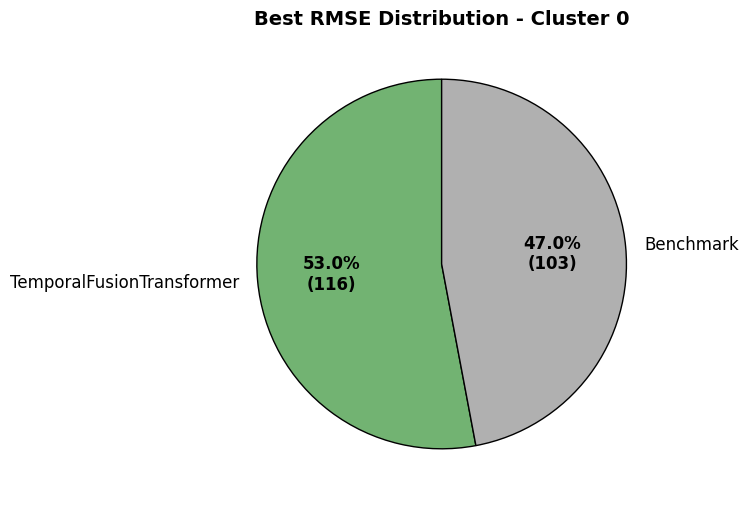

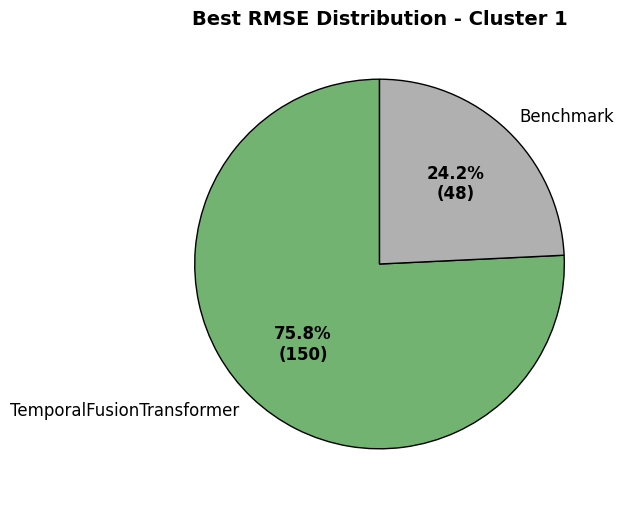

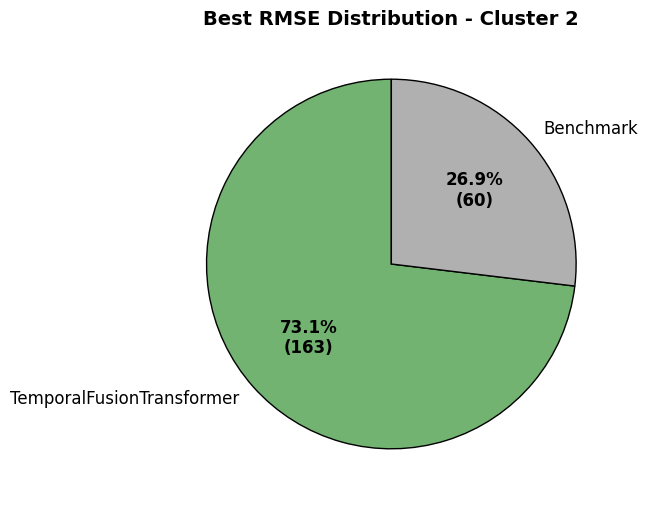

In [232]:
#a)
test_0 = tft_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = tft_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = tft_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_tft_mean": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_tft_mean": "TemporalFusionTransformer"
}


# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]
# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Define custom function to show percentage on top and count below
    def make_autopct(values):
        def autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'  # Line break between % and count
        return autopct

    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, 
        autopct=make_autopct(value_counts),  # Show % and count
        startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()


In [233]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_tft_mean']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_tft_mean']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_tft_mean']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: tft gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: tft gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: tft gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")

cluster 0: tft gana en 53.0% de casos
Mediana de la mejora: 5.6%
cluster 1: tft gana en 75.8% de casos
Mediana de la mejora: 15.8%
cluster 2: tft gana en 73.1% de casos
Mediana de la mejora: 14.1%


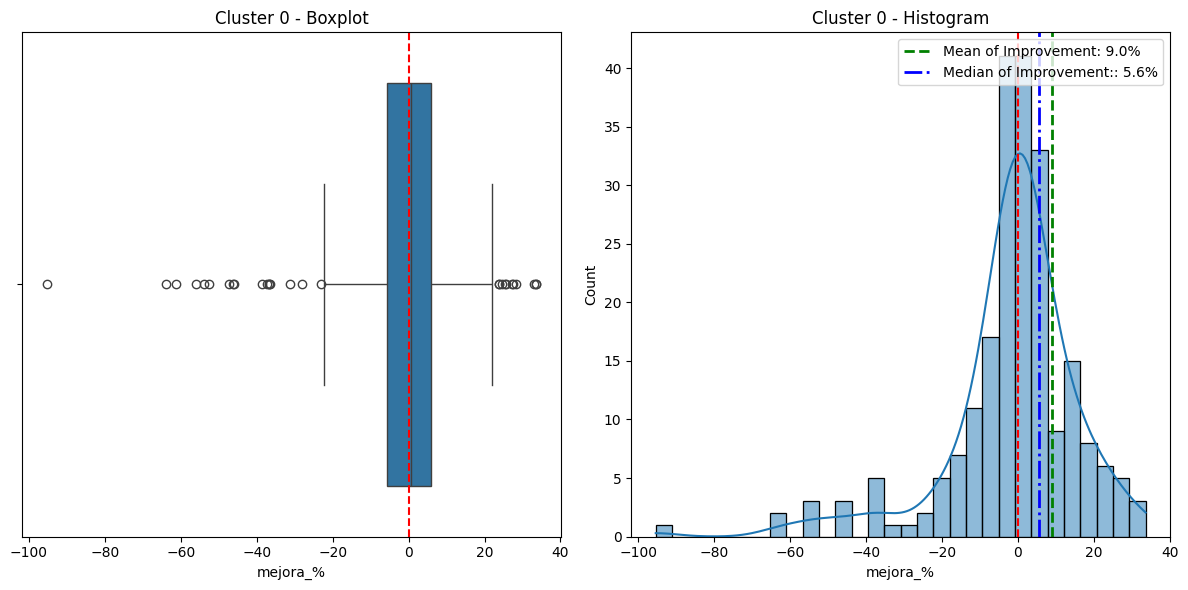

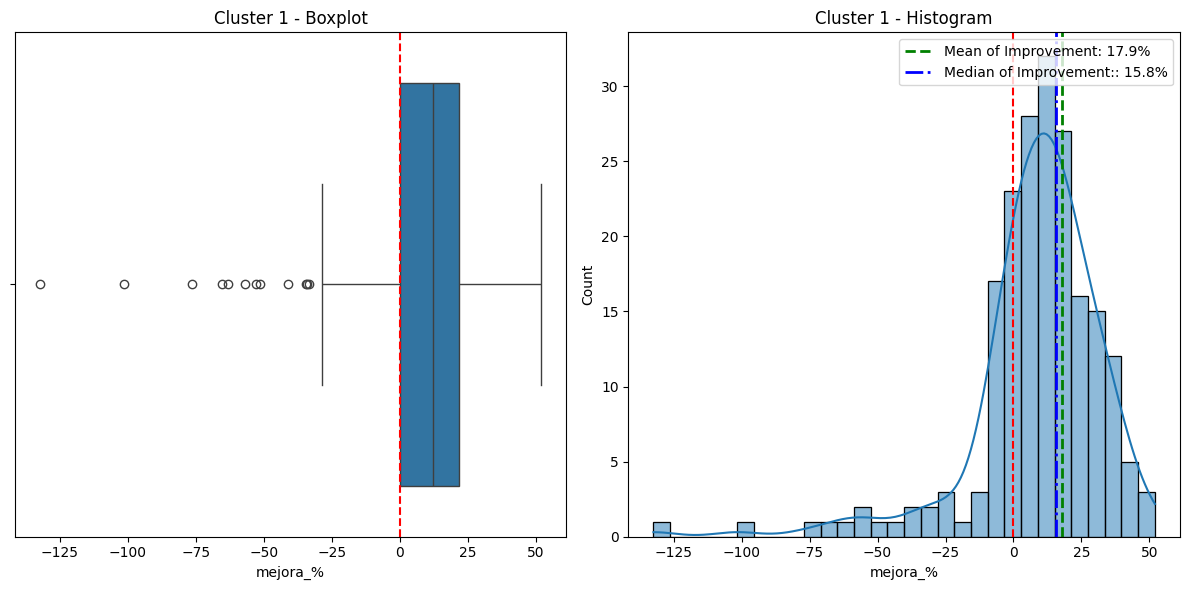

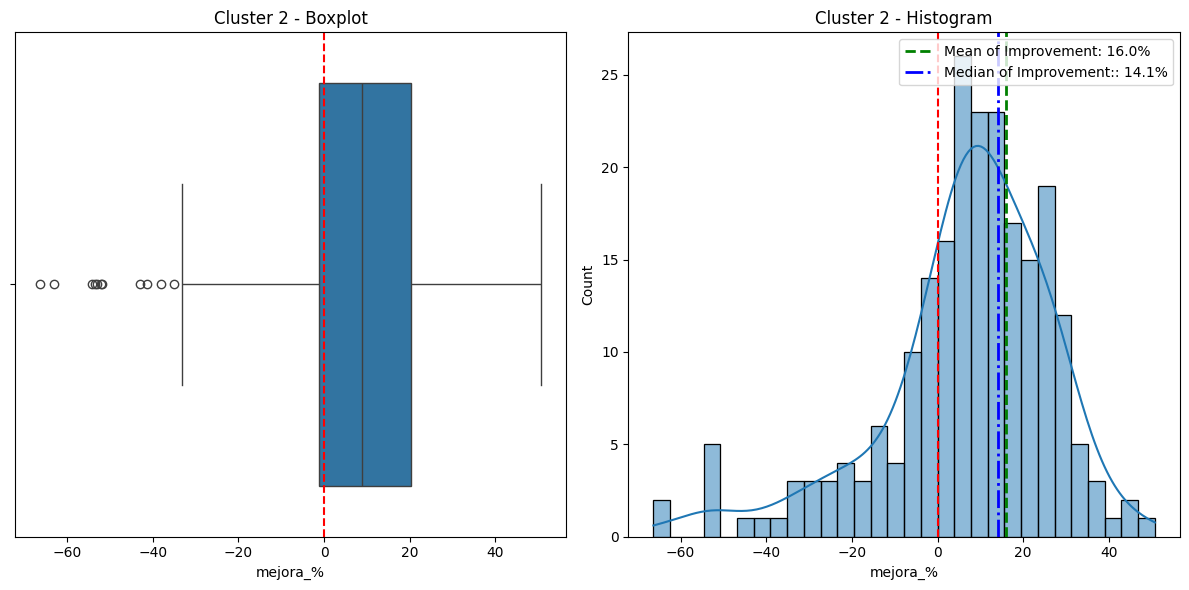

In [173]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')

    # Calculate mean and median (only positive improvements if needed)
    positive_improvements = data[data['mejora_%'] > 0]['mejora_%']
    mean_value = positive_improvements.mean()
    median_value = positive_improvements.median()

    # Add vertical lines for mean and median
    axes[1].axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean of Improvement: {mean_value:.1f}%')
    axes[1].axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median of Improvement:: {median_value:.1f}%')

    # Add legend
    axes[1].legend(loc='upper right', fontsize=10)

    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()

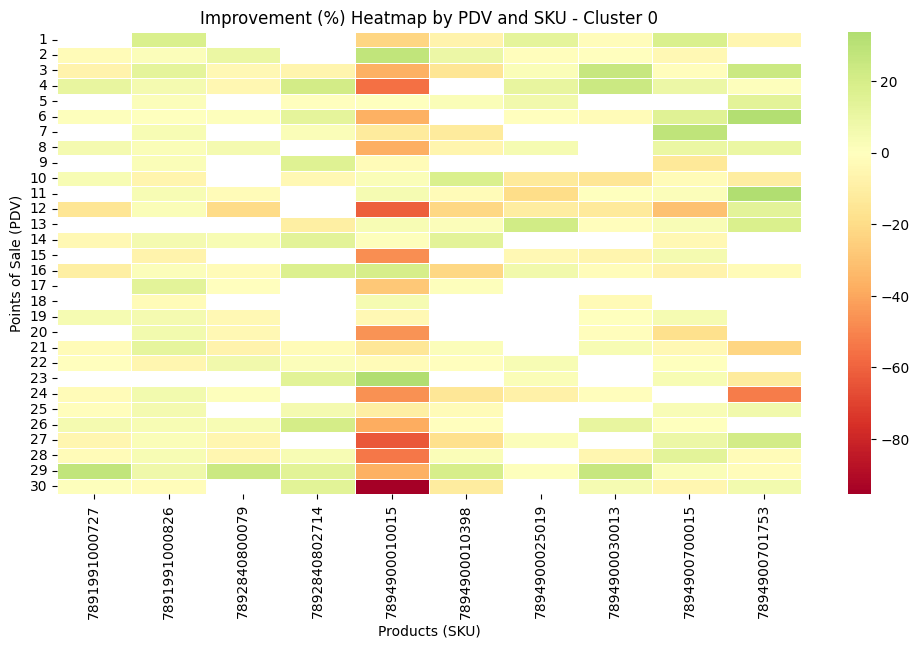

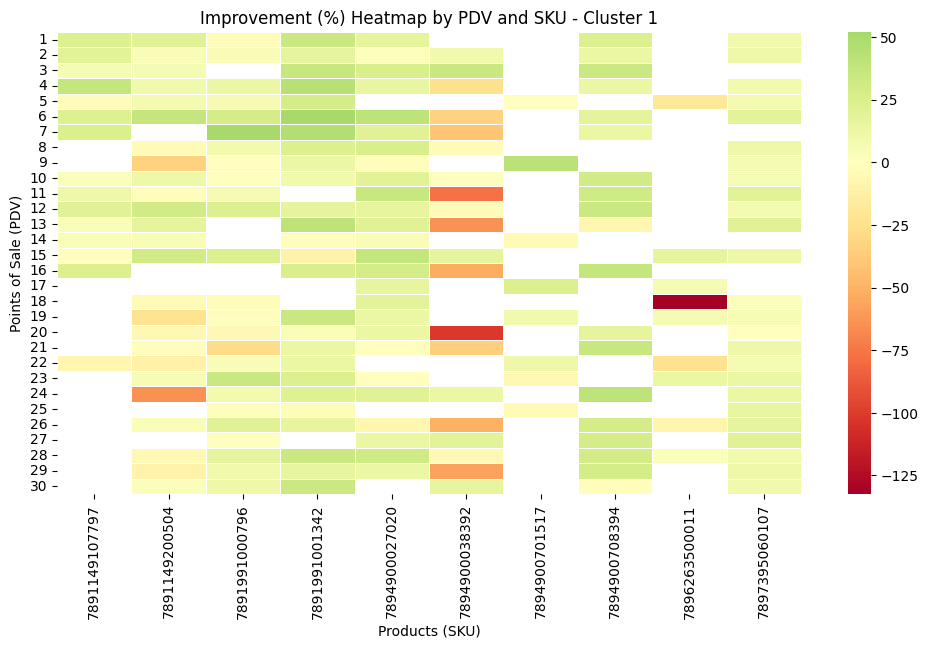

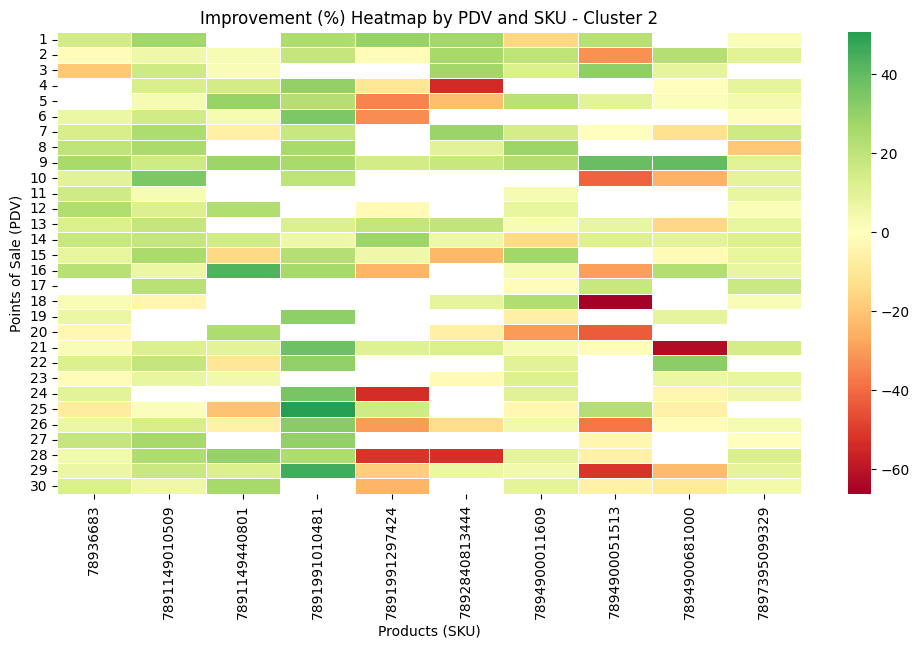

In [174]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately

# wave net

In [181]:
#  44584 seg
wavenet_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_wavenet.csv')
wavenet_0.columns
wavenet_0['rmse_cant_vta_pred_wavenet'] = np.where(
    wavenet_0['rmse_cant_vta_pred_wavenet_mean'] < wavenet_0['rmse_cant_vta_pred_wavenet_median'],
    wavenet_0['rmse_cant_vta_pred_wavenet_mean'],
    wavenet_0['rmse_cant_vta_pred_wavenet_median']
)
wavenet_0 = wavenet_0[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_wavenet']]

#   seg
wavenet_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_wavenet.csv')
wavenet_1.columns
wavenet_1['rmse_cant_vta_pred_wavenet'] = np.where(
    wavenet_1['rmse_cant_vta_pred_wavenet_mean'] < wavenet_1['rmse_cant_vta_pred_wavenet_median'],
    wavenet_1['rmse_cant_vta_pred_wavenet_mean'],
    wavenet_1['rmse_cant_vta_pred_wavenet_median']
)
wavenet_1 = wavenet_1[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_wavenet']]

#  52389 seg
wavenet_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_wavenet.csv')
wavenet_2.columns
wavenet_2['rmse_cant_vta_pred_wavenet'] = np.where(
    wavenet_2['rmse_cant_vta_pred_wavenet_mean'] < wavenet_2['rmse_cant_vta_pred_wavenet_median'],
    wavenet_2['rmse_cant_vta_pred_wavenet_mean'],
    wavenet_2['rmse_cant_vta_pred_wavenet_median']
)
wavenet_2 = wavenet_2[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_wavenet']]



In [182]:
print(wavenet_0['rmse_cant_vta_pred_wavenet'].median(),wavenet_0['rmse_cant_vta_pred_wavenet'].mean())
print(wavenet_1['rmse_cant_vta_pred_wavenet'].median(),wavenet_1['rmse_cant_vta_pred_wavenet'].mean())
print(wavenet_2['rmse_cant_vta_pred_wavenet'].median(),wavenet_2['rmse_cant_vta_pred_wavenet'].mean())

6549.0 8924.223744292238
41469.350000000006 152300.3095959596
20072.0 30615.825112107625


best_rmse
rmse_cant_vta_pred_wavenet         138
rmse_cant_vta_pred_mean_pdv_sku     81
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_wavenet         100
rmse_cant_vta_pred_mean_pdv_sku     98
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_wavenet         131
rmse_cant_vta_pred_mean_pdv_sku     92
Name: count, dtype: int64


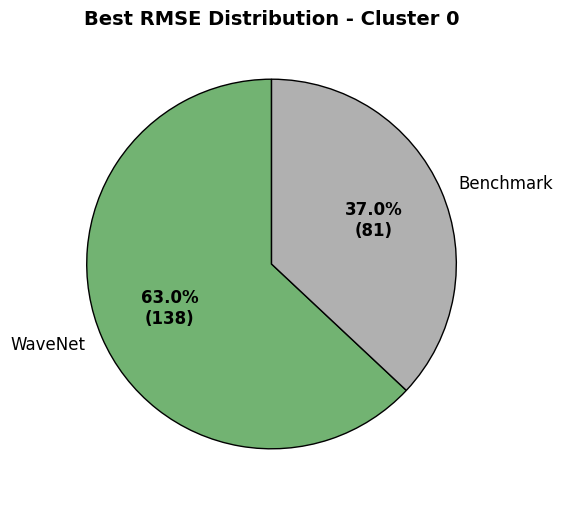

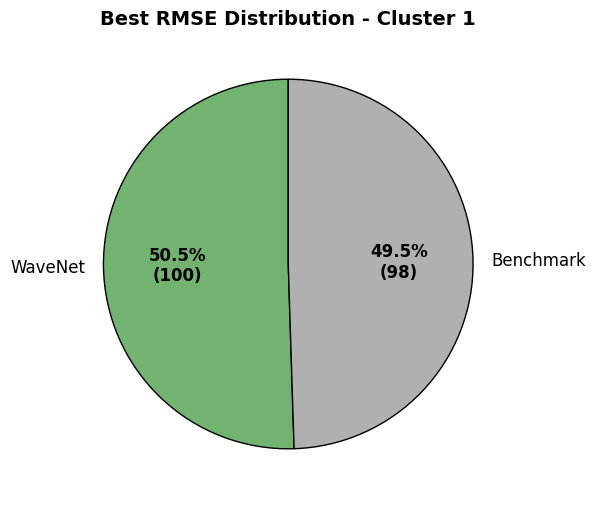

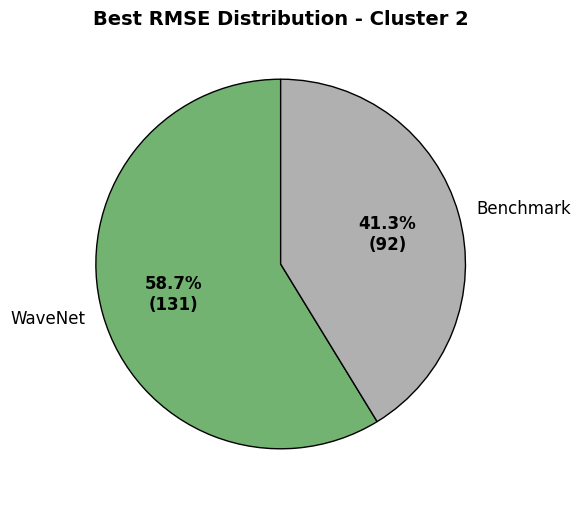

In [183]:
#a)
test_0 = wavenet_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = wavenet_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = wavenet_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_wavenet": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_wavenet": "WaveNet"
}

# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Define custom function to show percentage on top and count below
    def make_autopct(values):
        def autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'  # Line break between % and count
        return autopct

    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, 
        autopct=make_autopct(value_counts),  # Show % and count
        startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()

In [184]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_wavenet']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_wavenet']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_wavenet']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
print(test_2['mejora_%'].describe())

# 2. Estadísticos
print(f"cluster 0: wavenet gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: wavenet gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: wavenet gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")


count    198.000000
mean     -10.684838
std       39.281902
min     -196.789000
25%      -17.531750
50%        0.078000
75%       11.009750
max       49.856000
Name: mejora_%, dtype: float64
count    223.000000
mean      -6.373166
std       36.019955
min     -182.812000
25%      -18.356000
50%        4.199000
75%       16.578000
max       50.178000
Name: mejora_%, dtype: float64
cluster 0: wavenet gana en 63.0% de casos
Mediana de la mejora: 7.7%
cluster 1: wavenet gana en 50.5% de casos
Mediana de la mejora: 10.8%
cluster 2: wavenet gana en 58.7% de casos
Mediana de la mejora: 13.4%


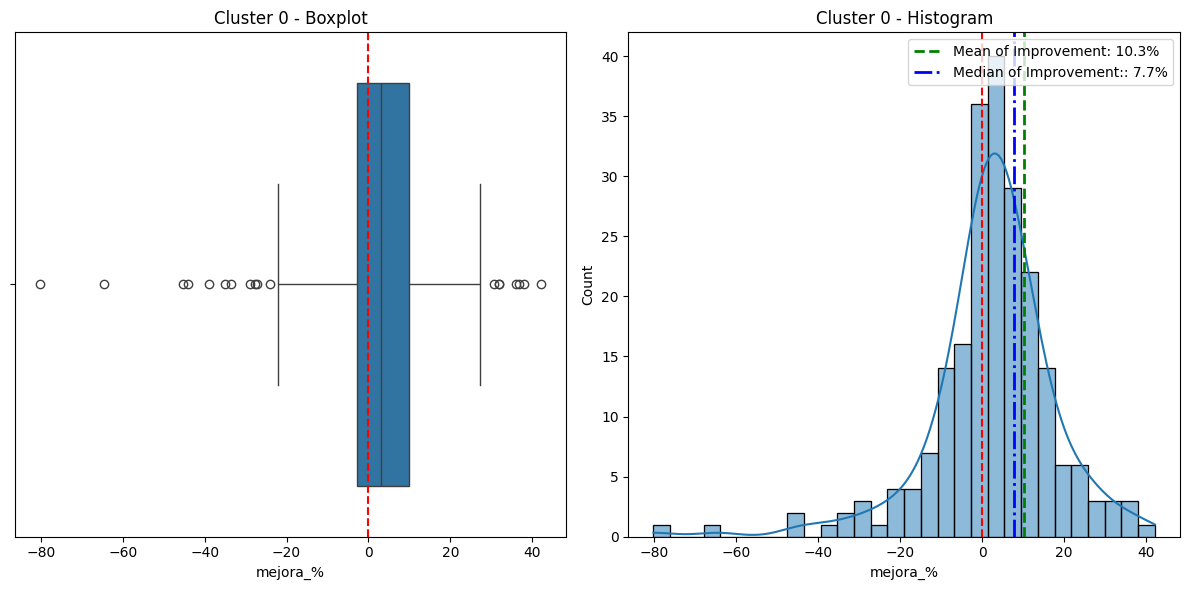

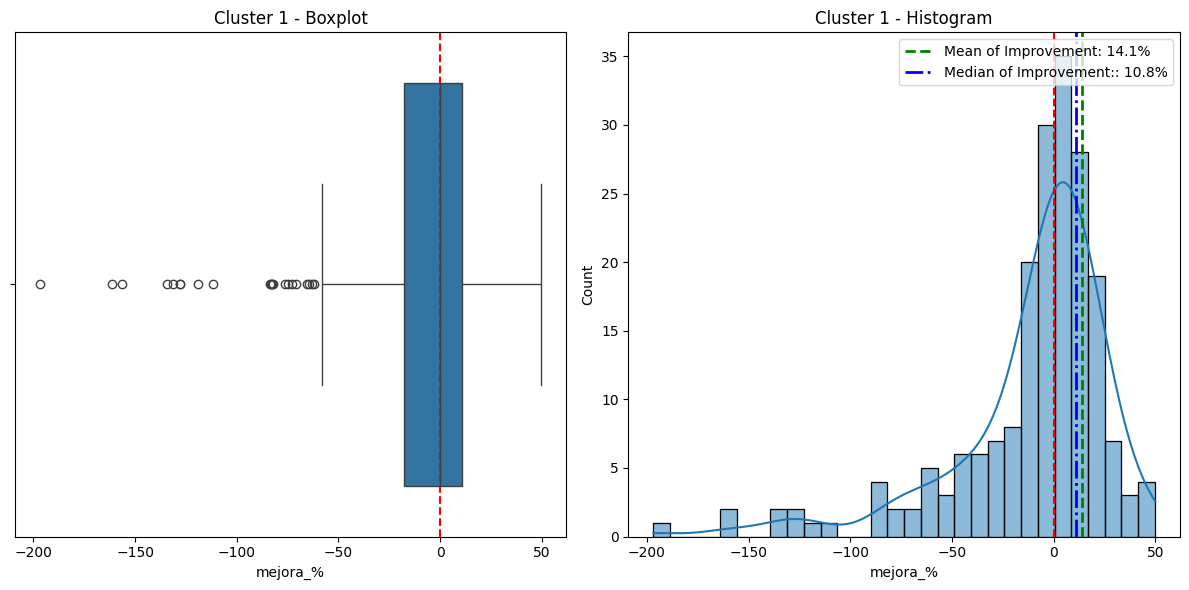

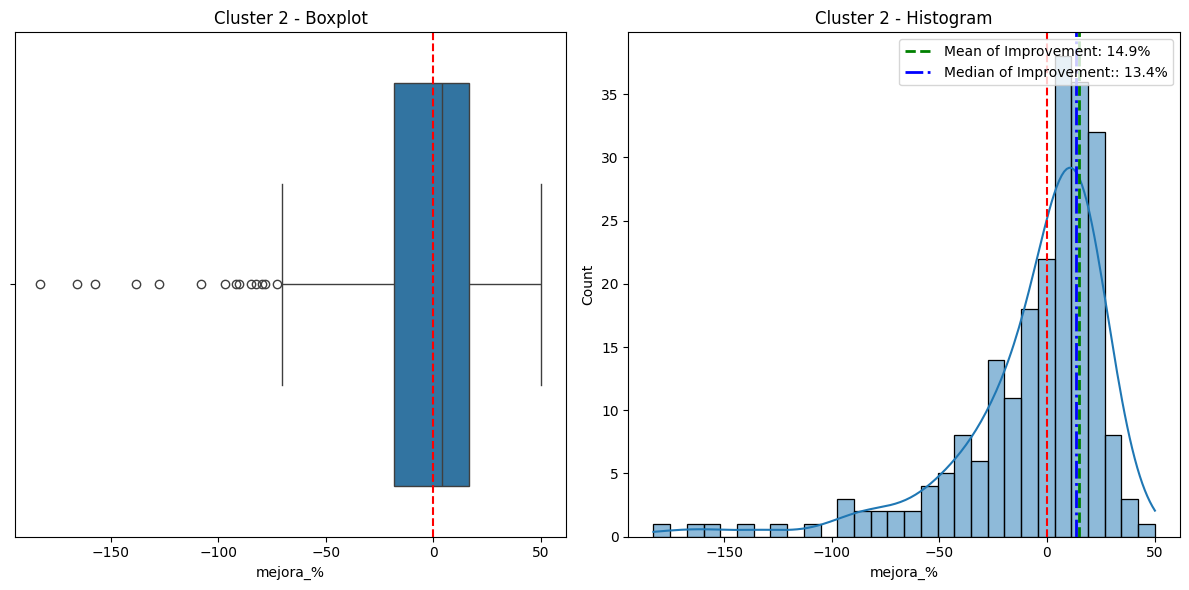

In [185]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')

    # Calculate mean and median (only positive improvements if needed)
    positive_improvements = data[data['mejora_%'] > 0]['mejora_%']
    mean_value = positive_improvements.mean()
    median_value = positive_improvements.median()

    # Add vertical lines for mean and median
    axes[1].axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean of Improvement: {mean_value:.1f}%')
    axes[1].axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median of Improvement:: {median_value:.1f}%')

    # Add legend
    axes[1].legend(loc='upper right', fontsize=10)

    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()

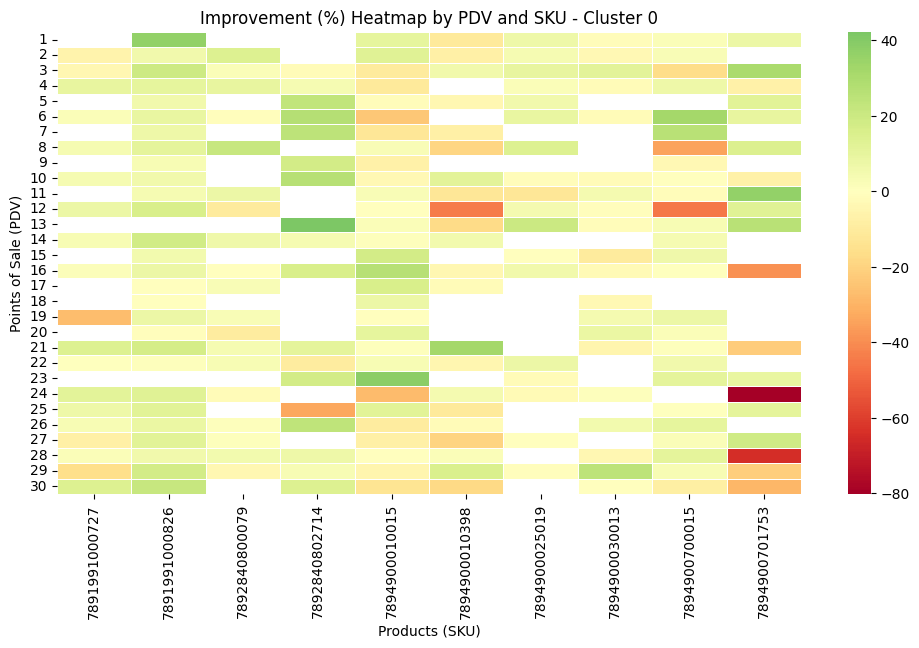

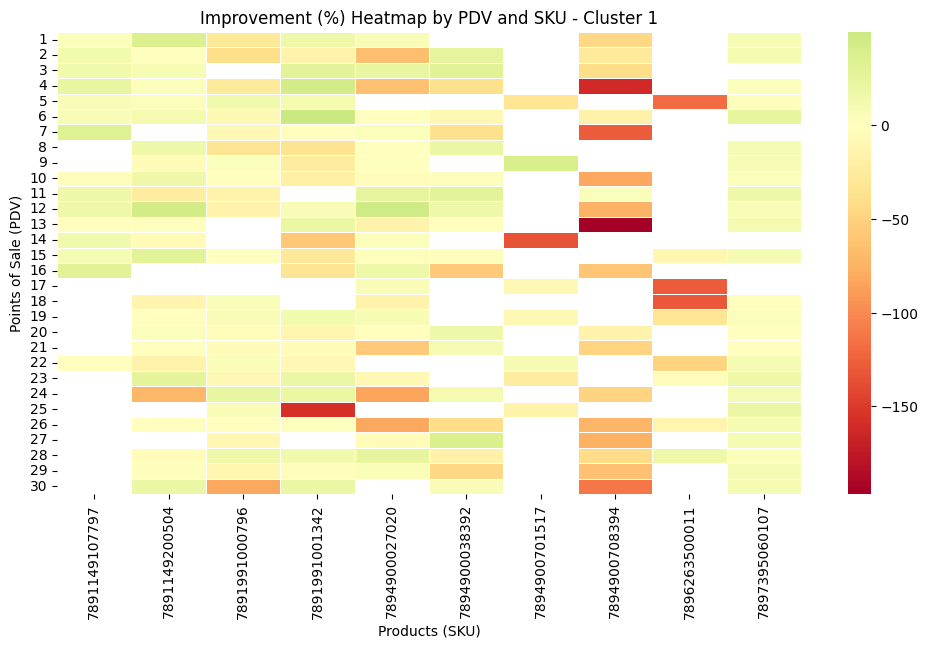

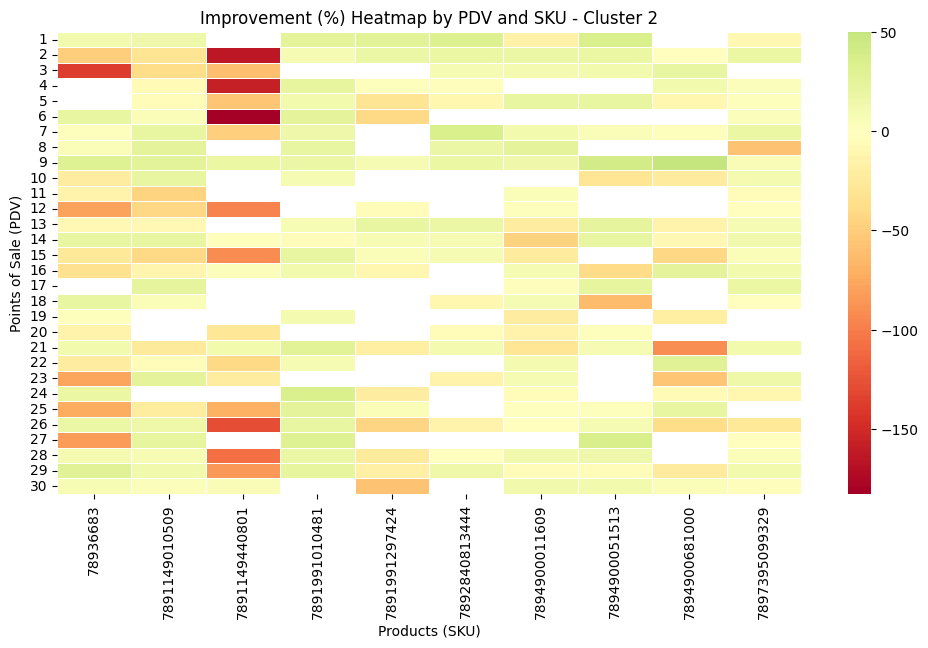

In [186]:
# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately

# Total Comparison

In [187]:
def plot_best_model_pies(cluster_num):
    """
    Create accurate pie charts with consistent colors, bold text, and correct percentages
    """
    # Model order and display names
    MODEL_ORDER = [
        'rmse_cant_vta_pred_tft_mean',
        'rmse_cant_vta_pred_deepar',
        'rmse_cant_vta_pred_sff_mean',
        'rmse_cant_vta_pred_wavenet',
        'rmse_cant_vta_pred_mean_pdv_sku'
    ]
    
    DISPLAY_NAMES = {
        'rmse_cant_vta_pred_tft_mean': 'Temporal Fusion\nTransformer',
        'rmse_cant_vta_pred_deepar': 'DeepAR',
        'rmse_cant_vta_pred_sff_mean': 'Simple Feed\nForward',
        'rmse_cant_vta_pred_wavenet': 'WaveNet',
        'rmse_cant_vta_pred_mean_pdv_sku': 'Benchmark'
    }

    # Custom color palette
    COLORS = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974']

    # Get summary data
    try:
        summary_df = globals()[f'summary_{cluster_num}'].copy()
    except KeyError:
        raise ValueError(f"summary_{cluster_num} not found")

    # Create figure
    plt.figure(figsize=(18, 10))
    
    # --- RMSE Pie Chart ---
    plt.subplot(1, 2, 1)
    rmse_counts = summary_df['best_rmse'].value_counts()
    
    # Get ACTUAL total count (before reindexing)
    total_count = rmse_counts.sum()
    
    # Reindex to maintain order (fill missing models with 0)
    rmse_ordered = rmse_counts.reindex(MODEL_ORDER, fill_value=0)
    rmse_display = rmse_ordered.rename(index=DISPLAY_NAMES)
    
    # Filter out models with zero counts for display
    non_zero_mask = rmse_ordered > 0
    rmse_to_plot = rmse_ordered[non_zero_mask]
    colors_to_plot = [COLORS[i] for i, val in enumerate(non_zero_mask) if val]
    
    # Plot with correct percentages
    wedges, texts, autotexts = plt.pie(
        rmse_to_plot,
        labels=rmse_display.index[non_zero_mask],
        colors=colors_to_plot,
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12, 'weight': 'bold'},
        autopct=lambda p: f'{p:.1f}%\n({int(round(p/100*total_count))})'
    )
    
    # Style autopct text
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_weight('bold')
    
    plt.title(
        f'Best Models by RMSE\n(Cluster {cluster_num})', 
        pad=25, 
        fontsize=16, 
        weight='bold'
    )
    
    plt.tight_layout()
    plt.show()

    # Print original counts
    print(f"\nCluster {cluster_num} - Best RMSE counts (original names):")
    print(rmse_counts.to_string())

In [198]:
def calculate_model_rankings(summary_df, cluster_num):
    """
    Analyzes model performance using percentile rankings in addition to RMSE.
    Returns a DataFrame with rankings and comparison with original best model selection.
    """
    # Model names mapping (same as before)
    MODEL_NAMES = {
        'rmse_cant_vta_pred_tft_mean': 'Temporal Fusion Transformer',
        'rmse_cant_vta_pred_deepar': 'DeepAR',
        'rmse_cant_vta_pred_sff_mean': 'Simple Feed Forward',
        'rmse_cant_vta_pred_wavenet': 'WaveNet',
        'rmse_cant_vta_pred_mean_pdv_sku': 'Benchmark'
    }
    
    # Get only RMSE columns
    rmse_cols = [col for col in summary_df.columns if col.startswith('rmse_') and col != 'best_rmse']
    
    # Calculate rankings for each product-store combination
    rank_df = summary_df[rmse_cols].rank(axis=1, method='min')
    
    # Calculate mean ranking per model
    mean_ranks = round(rank_df.mean().sort_values(),2)
    best_model_rank = mean_ranks.idxmin()
    
    # Compare with original best model selection
    original_best_counts = summary_df['best_rmse'].value_counts()
    
    # Create comparison DataFrame
    comparison = pd.DataFrame({
        'Model': [MODEL_NAMES.get(col, col) for col in mean_ranks.index],
        'Technical_Name': mean_ranks.index,
        'Mean_Rank': mean_ranks.values,
        'Times_Selected_As_Best': [original_best_counts.get(col, 0) for col in mean_ranks.index]
    }).sort_values('Mean_Rank')
    
    # Print results
    print(f"\nCluster {cluster_num} - Model Performance Analysis")
    print("="*50)
    print("Models ranked by average percentile position (lower is better):")
    print(comparison[['Model', 'Mean_Rank', 'Times_Selected_As_Best']].to_string(index=False))
    
    print(f"\nBest model by ranking: {MODEL_NAMES.get(best_model_rank, best_model_rank)}")
    print(f"Most frequently selected model: {MODEL_NAMES.get(original_best_counts.idxmax(), original_best_counts.idxmax())}")
    
    return comparison

## Cluster 0

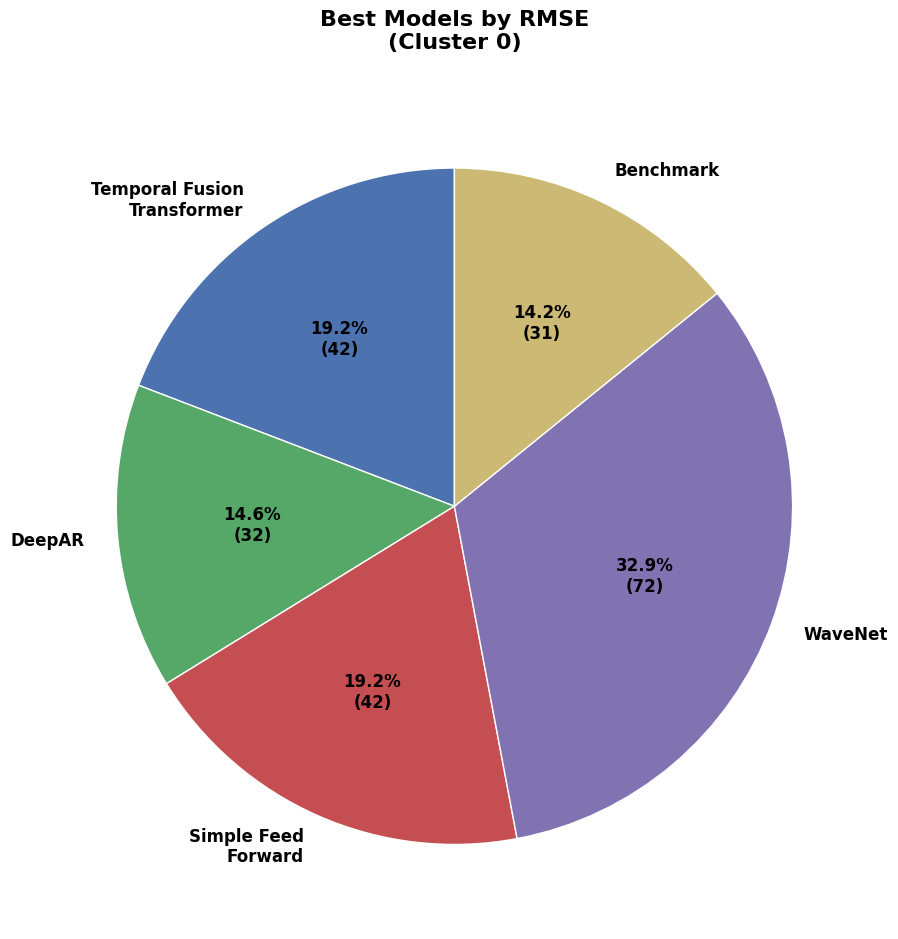


Cluster 0 - Best RMSE counts (original names):
best_rmse
rmse_cant_vta_pred_wavenet         72
rmse_cant_vta_pred_sff_mean        42
rmse_cant_vta_pred_tft_mean        42
rmse_cant_vta_pred_deepar          32
rmse_cant_vta_pred_mean_pdv_sku    31


In [222]:
test_0 = sff_0.merge(tft_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(deepar_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(wavenet_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')

summary_0 = create_summary_dataframe(test_0)
summary_0['best_rmse'].value_counts()
plot_best_model_pies(0)

In [223]:
calculate_model_rankings(summary_0, 0)


Cluster 0 - Model Performance Analysis
Models ranked by average percentile position (lower is better):
                      Model  Mean_Rank  Times_Selected_As_Best
                    WaveNet       2.50                      72
Temporal Fusion Transformer       2.97                      42
        Simple Feed Forward       3.01                      42
                  Benchmark       3.21                      31
                     DeepAR       3.31                      32

Best model by ranking: WaveNet
Most frequently selected model: WaveNet


,Model,Technical_Name,Mean_Rank,Times_Selected_As_Best
0,WaveNet,rmse_cant_vta_pred_wavenet,2.50,72
1,Temporal Fusion Transformer,rmse_cant_vta_pred_tft_mean,2.97,42
2,Simple Feed Forward,rmse_cant_vta_pred_sff_mean,3.01,42
3,Benchmark,rmse_cant_vta_pred_mean_pdv_sku,3.21,31
4,DeepAR,rmse_cant_vta_pred_deepar,3.31,32


## Cluster 1

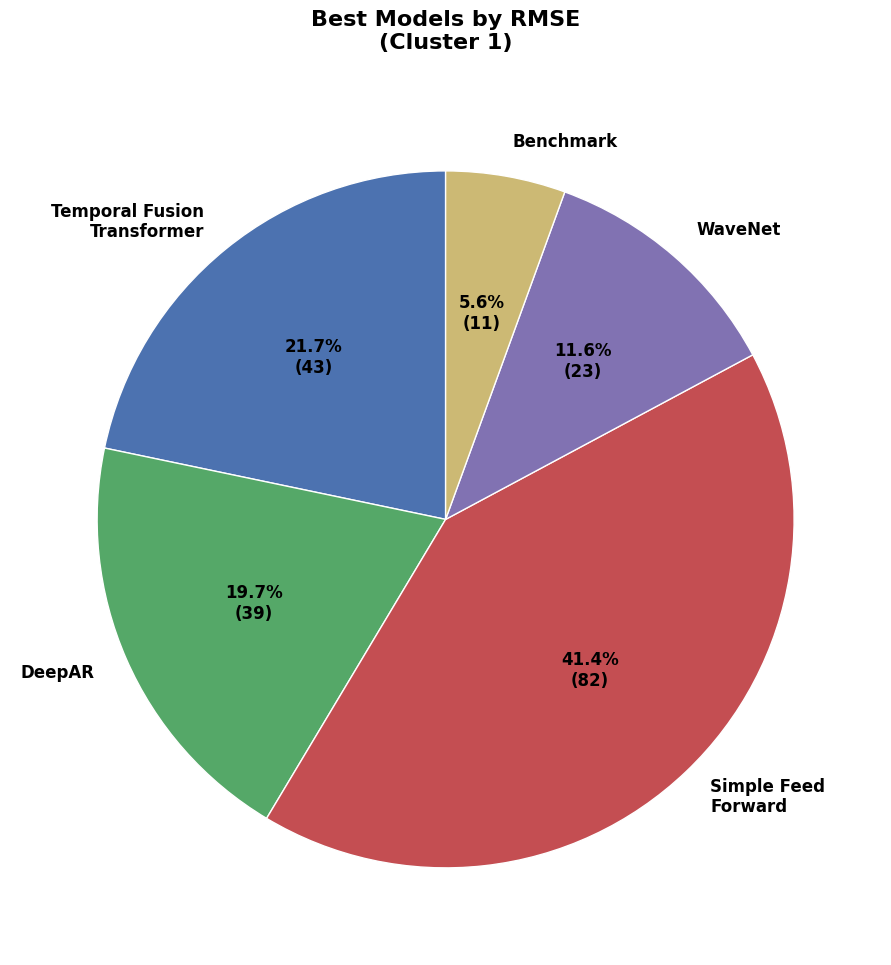


Cluster 1 - Best RMSE counts (original names):
best_rmse
rmse_cant_vta_pred_sff_mean        82
rmse_cant_vta_pred_tft_mean        43
rmse_cant_vta_pred_deepar          39
rmse_cant_vta_pred_wavenet         23
rmse_cant_vta_pred_mean_pdv_sku    11


In [218]:
test_1 = sff_1.merge(tft_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(deepar_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(wavenet_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
summary_1['best_rmse'].value_counts()
plot_best_model_pies(1)

In [219]:
calculate_model_rankings(summary_1, 1)


Cluster 1 - Model Performance Analysis
Models ranked by average percentile position (lower is better):
                      Model  Mean_Rank  Times_Selected_As_Best
        Simple Feed Forward       2.11                      82
Temporal Fusion Transformer       2.56                      43
                     DeepAR       3.01                      39
                    WaveNet       3.54                      23
                  Benchmark       3.78                      11

Best model by ranking: Simple Feed Forward
Most frequently selected model: Simple Feed Forward


,Model,Technical_Name,Mean_Rank,Times_Selected_As_Best
0,Simple Feed Forward,rmse_cant_vta_pred_sff_mean,2.11,82
1,Temporal Fusion Transformer,rmse_cant_vta_pred_tft_mean,2.56,43
2,DeepAR,rmse_cant_vta_pred_deepar,3.01,39
3,WaveNet,rmse_cant_vta_pred_wavenet,3.54,23
4,Benchmark,rmse_cant_vta_pred_mean_pdv_sku,3.78,11


## Cluster 2

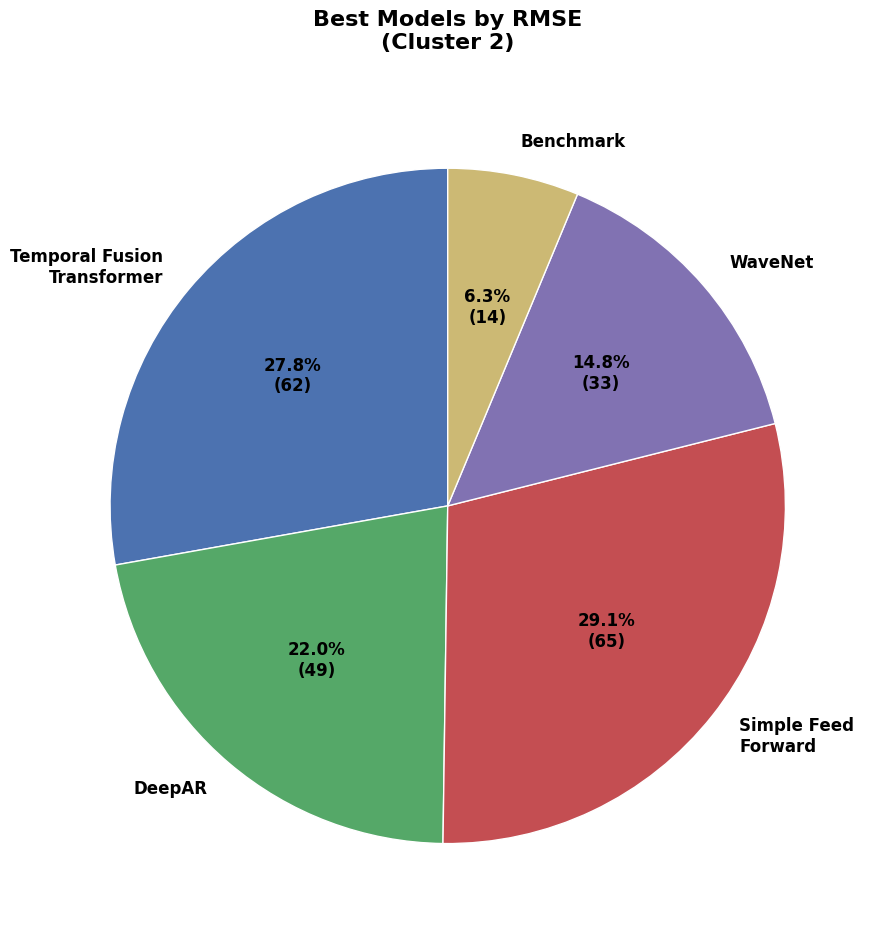


Cluster 2 - Best RMSE counts (original names):
best_rmse
rmse_cant_vta_pred_sff_mean        65
rmse_cant_vta_pred_tft_mean        62
rmse_cant_vta_pred_deepar          49
rmse_cant_vta_pred_wavenet         33
rmse_cant_vta_pred_mean_pdv_sku    14


In [220]:
test_2 = sff_2.merge(tft_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(deepar_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(wavenet_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
summary_2['best_rmse'].value_counts()
plot_best_model_pies(2)

In [221]:
calculate_model_rankings(summary_2, 2)


Cluster 2 - Model Performance Analysis
Models ranked by average percentile position (lower is better):
                      Model  Mean_Rank  Times_Selected_As_Best
        Simple Feed Forward       2.47                      65
Temporal Fusion Transformer       2.53                      62
                     DeepAR       2.89                      49
                    WaveNet       3.22                      33
                  Benchmark       3.89                      14

Best model by ranking: Simple Feed Forward
Most frequently selected model: Simple Feed Forward


,Model,Technical_Name,Mean_Rank,Times_Selected_As_Best
0,Simple Feed Forward,rmse_cant_vta_pred_sff_mean,2.47,65
1,Temporal Fusion Transformer,rmse_cant_vta_pred_tft_mean,2.53,62
2,DeepAR,rmse_cant_vta_pred_deepar,2.89,49
3,WaveNet,rmse_cant_vta_pred_wavenet,3.22,33
4,Benchmark,rmse_cant_vta_pred_mean_pdv_sku,3.89,14


# best model vs XGBOOST

In [234]:
sff_0

,pdv_codigo,codigo_barras_sku,rmse_cant_vta_pred_sff_mean
0,1,7891991000826,2329.6
1,1,7894900010015,6539.9
2,1,7894900010398,5537.6
3,1,7894900025019,2052.4
4,1,7894900030013,1557.8
...,...,...,...
214,30,7894900010015,4683.7
215,30,7894900010398,6522.8
216,30,7894900030013,1160.6
217,30,7894900700015,5021.9


In [254]:
# 59 seg
xgboost_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_xgboost.csv')
xgboost_0 = xgboost_0[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_xgb_sku']]

# 78 seg
xgboost_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_xgboost.csv')
xgboost_1 = xgboost_1[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_xgb_sku']]

# 77 seg
xgboost_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_xgboost.csv')
xgboost_2 = xgboost_2[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_xgb_sku']] 


In [263]:
print(xgboost_0['rmse_cant_vta_pred_xgb_sku'].median(),xgboost_0['rmse_cant_vta_pred_xgb_sku'].mean())
print(xgboost_1['rmse_cant_vta_pred_xgb_sku'].median(),xgboost_1['rmse_cant_vta_pred_xgb_sku'].mean())
print(xgboost_2['rmse_cant_vta_pred_xgb_sku'].median(),xgboost_2['rmse_cant_vta_pred_xgb_sku'].mean())

6921.8 9925.297716894978
40400.25 162346.02171717174
18007.9 29839.449327354258


In [262]:
test_0 = xgboost_0.merge(sff_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = xgboost_1.merge(sff_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = xgboost_2.merge(sff_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())


best_rmse
rmse_cant_vta_pred_sff_mean    133
rmse_cant_vta_pred_xgb_sku      86
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_sff_mean    148
rmse_cant_vta_pred_xgb_sku      50
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_sff_mean    131
rmse_cant_vta_pred_xgb_sku      92
Name: count, dtype: int64
